In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt # data manipulation 
import numpy as np # data manipulation 
import pandas as pd # data visualisation

from sklearn.datasets import load_boston # dataset
from sklearn.model_selection import train_test_split # to split the data

In [0]:
dataset = load_boston()

In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
columns = np.concatenate((np.copy(dataset.feature_names),['Median (Target)']))
data_df = pd.DataFrame(np.concatenate((dataset.data, dataset.target.reshape(-1,1)), axis = 1), columns = columns )

In [0]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median (Target)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
# Get the data
X, Y = dataset.data, dataset.target
N, D = X.shape

In [0]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


Train on 404 samples, validate on 102 samples
Epoch 1/400
404/404 - 0s - loss: 132660.0270 - val_loss: 113441.0541
Epoch 2/400
404/404 - 0s - loss: 86733.9144 - val_loss: 74948.1516
Epoch 3/400
404/404 - 0s - loss: 56146.4326 - val_loss: 47763.4348
Epoch 4/400
404/404 - 0s - loss: 34473.8895 - val_loss: 27759.8842
Epoch 5/400
404/404 - 0s - loss: 18868.6374 - val_loss: 14172.7715
Epoch 6/400
404/404 - 0s - loss: 8712.1979 - val_loss: 5679.0329
Epoch 7/400
404/404 - 0s - loss: 3139.0699 - val_loss: 1641.1837
Epoch 8/400
404/404 - 0s - loss: 988.7195 - val_loss: 497.2642
Epoch 9/400
404/404 - 0s - loss: 624.2628 - val_loss: 360.0619
Epoch 10/400
404/404 - 0s - loss: 516.1602 - val_loss: 321.3861
Epoch 11/400
404/404 - 0s - loss: 411.0091 - val_loss: 283.0566
Epoch 12/400
404/404 - 0s - loss: 336.0019 - val_loss: 318.6302
Epoch 13/400
404/404 - 0s - loss: 296.5219 - val_loss: 254.6606
Epoch 14/400
404/404 - 0s - loss: 264.7760 - val_loss: 238.2357
Epoch 15/400
404/404 - 0s - loss: 233.374

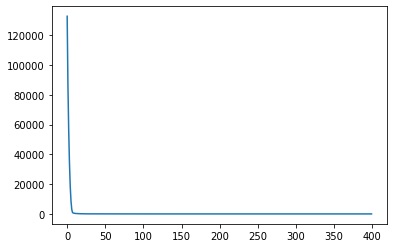

In [0]:
# Create the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape = (D,)) # we wont use an activation function since this is a regression problem
])

# compile the model with SGD and MSE
# optimizer = adam [CHECKED 3rd], nadam [2nd], rmsprop[1st]
model.compile(optimizer = tf.keras.optimizers.RMSprop(momentum = 0.8), loss = 'mse')

# scheduler
def schedule(epochs, lr):
  if epochs >= 100:
    return lr - (lr*0.1)
  return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# fit the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [scheduler], epochs = 400, verbose = 2)

# plot the loss function
plt.plot(r.history['loss'], label = 'loss')

In [0]:
preds = model.predict(X_test).flatten()
abs_error = abs(preds - y_test)
pd.DataFrame(np.concatenate((preds.reshape(-1,1),
                             y_test.reshape(-1,1),
                             abs_error.reshape(-1,1)), axis = 1), columns = ['Predictions', 'True Values', 'Absolute Error'])

,Predictions,True Values,Absolute Error
0,21.791380,20.6,1.191380
1,16.211704,13.1,3.111704
2,28.027868,29.9,1.872132
3,24.108631,23.7,0.408631
4,23.041586,19.5,3.541586
...,...,...,...
97,12.390631,13.4,1.009369
98,28.370838,28.7,0.329162
99,28.437128,36.1,7.662872
100,24.754667,24.5,0.254667
